## *Submitted by* - `Sunita Pradhan`

In [3]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Reading datas

data = pd.read_csv(r"D:\PA_data\rideshare_kaggle.csv")

In [3]:
#Fatchiing 1st 2 rows of data
data.head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600


In [4]:
#Shape of the data
data.shape

(693071, 57)

In [5]:
#Brief info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### Missing value detection

In [6]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [7]:
#Checking if there any duplicated value
data.duplicated().sum()

0

There is no duplicate values.

In [4]:
#Creating a copy of original data
df = data.copy()

In [5]:
#all numerical columns
numerical_col = df.select_dtypes(["float64","int64"]).columns
numerical_col

Index(['timestamp', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

In [6]:
#all Categorical columns
categorical_col = df.select_dtypes(["object"]).columns
categorical_col

Index(['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')

In [11]:
#Unique values of categorical columns
for col in categorical_col:
    print(f'{col} : {df[col].nunique()}')

id : 693071
datetime : 31350
timezone : 1
source : 12
destination : 12
cab_type : 2
product_id : 13
name : 13
short_summary : 9
long_summary : 11
icon : 7


In [12]:
df_numerical_col = df[['timestamp', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime']]

df_numerical_col.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [13]:
df_categorical_col = df[['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon']]

df_categorical_col.describe()

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


In [14]:
df.shape

(693071, 57)

### Handling missing values

In [7]:
df['price'] = df['price'].fillna(df['price'].median())

In [8]:
df.shape

(693071, 57)

### Checking For Outliers

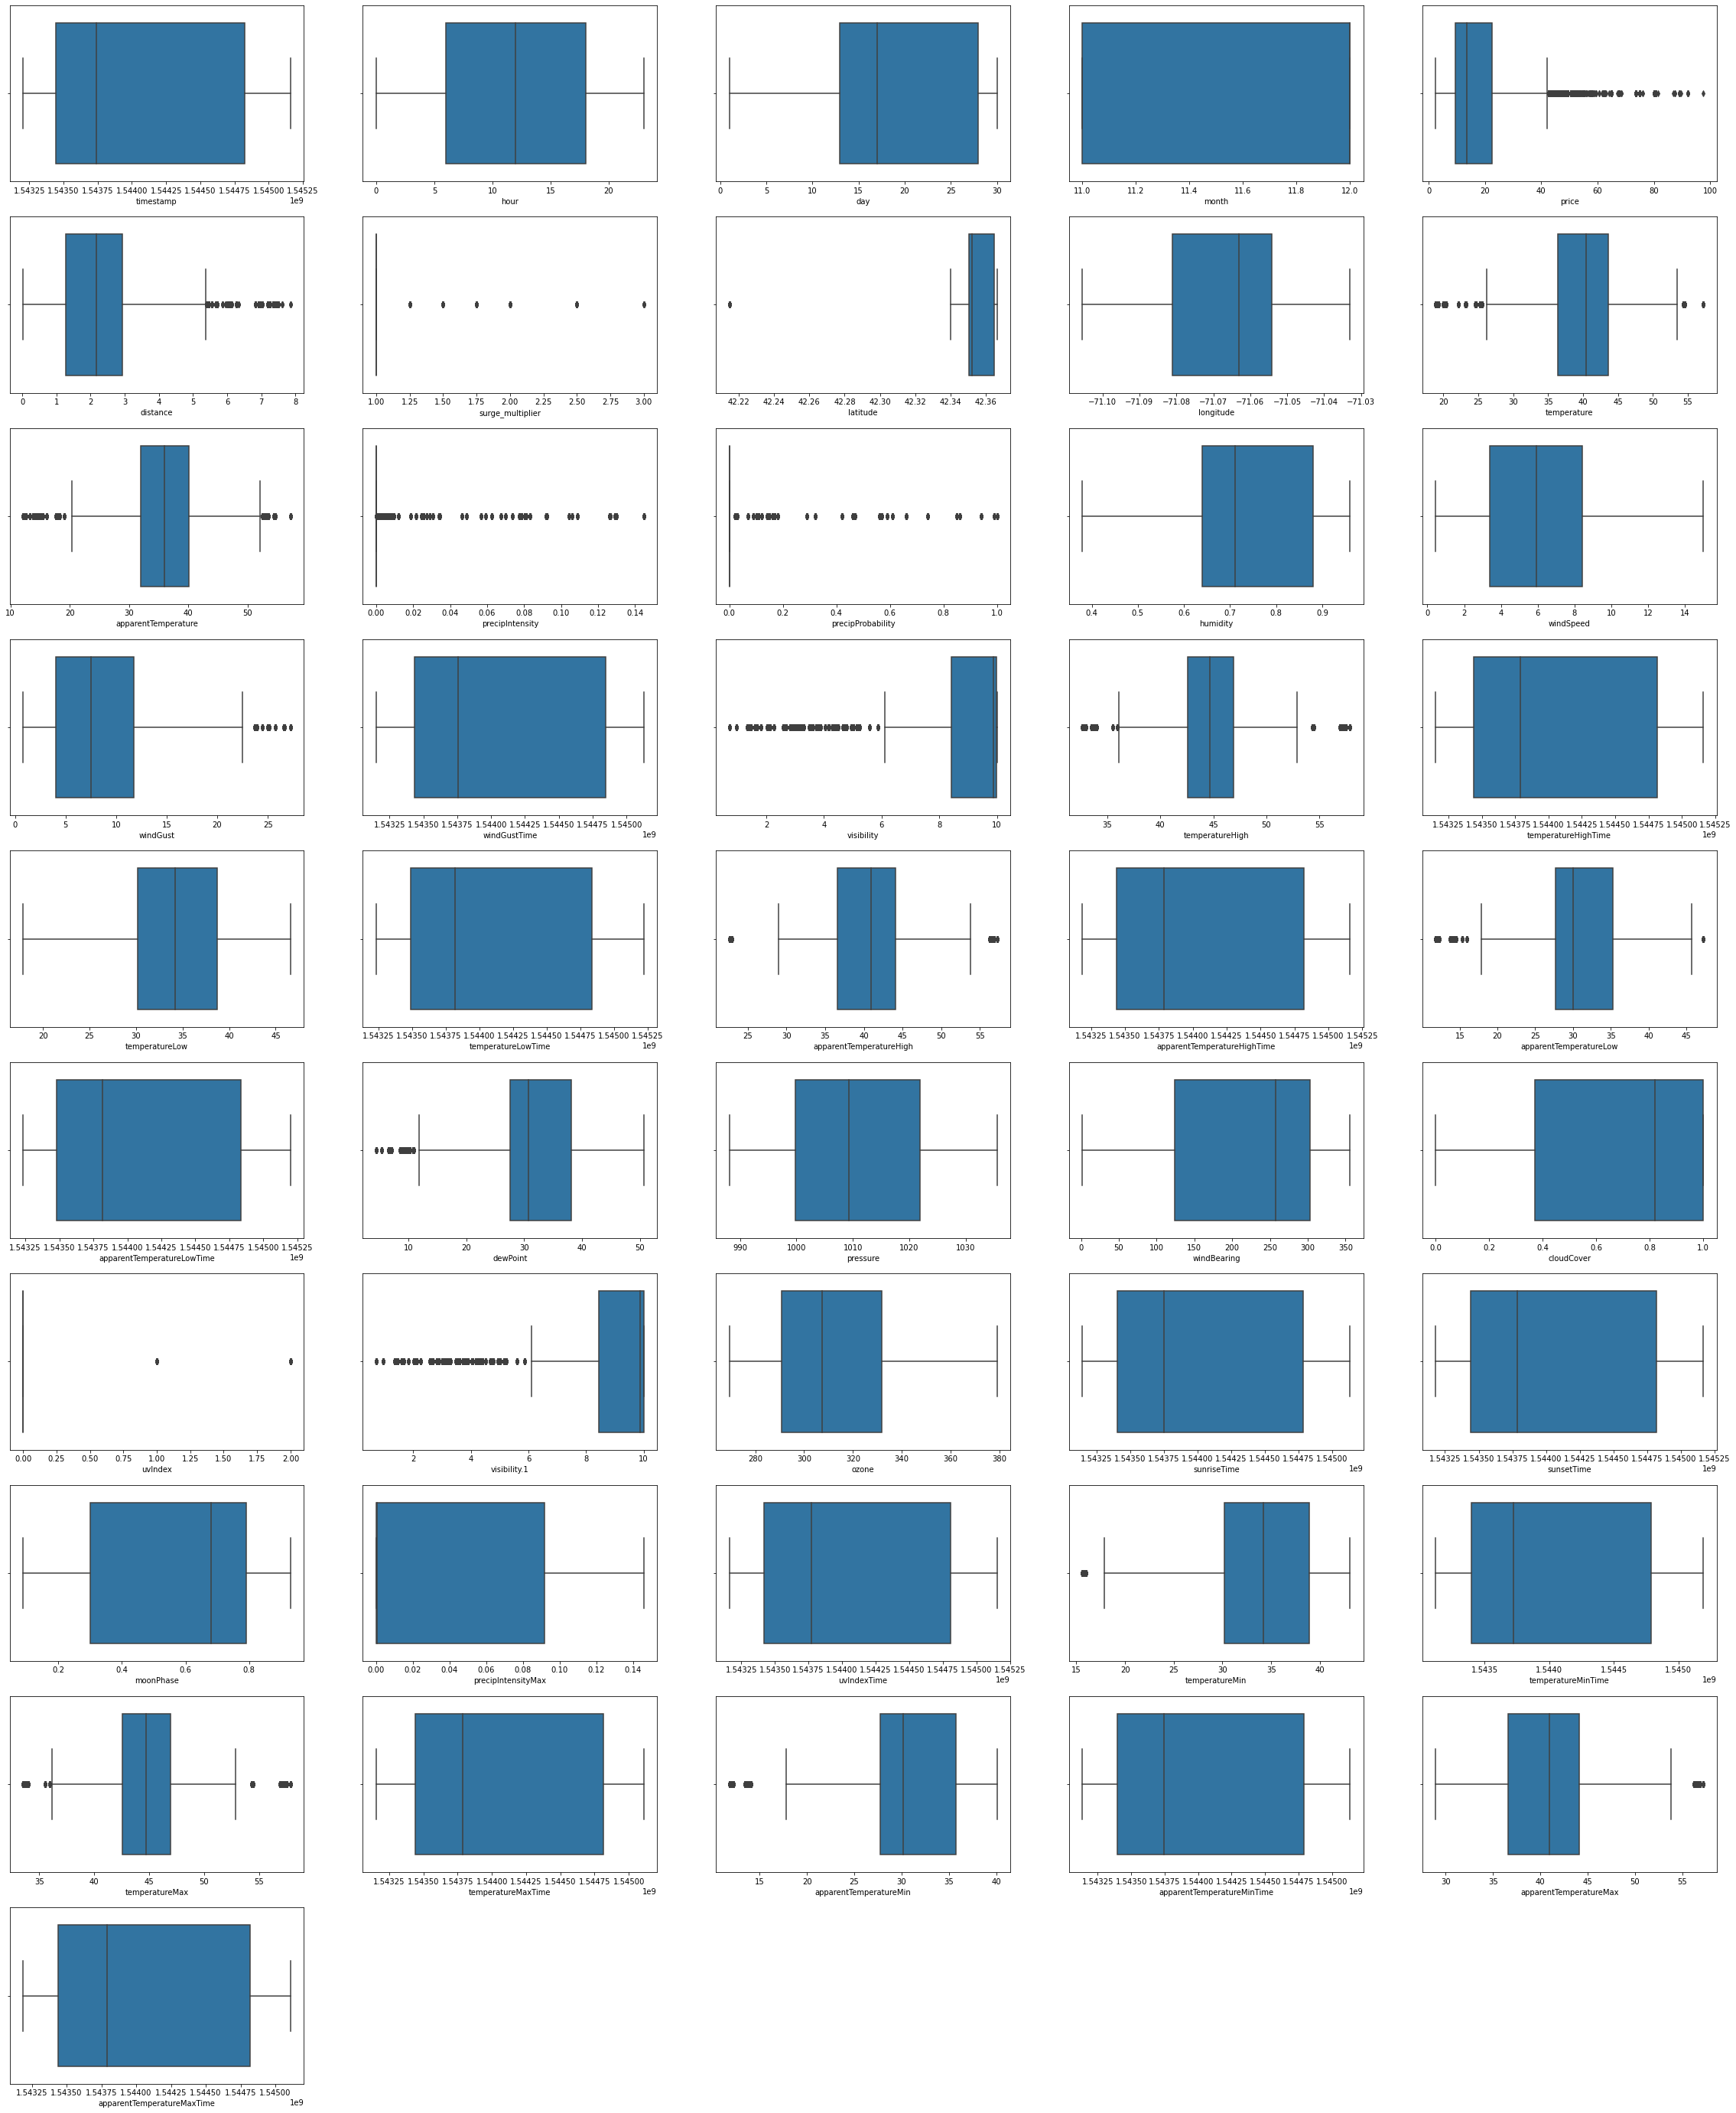

In [17]:
fig = plt.figure(figsize=[40,50])
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(10,5, i+1);
    ax1 = sns.boxplot(data = df, x=col)

### Handling Outliers

In [9]:
# Calculate IQR for numerical columns
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1

# Remove data points outside the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df[numerical_col] < lower_bound) | (df[numerical_col] > upper_bound)).any(axis=1)]

In [10]:
lower_percentile = 5
upper_percentile = 95

# Calculate lower and upper bounds based on percentiles
lower_bound = df[numerical_col].quantile(lower_percentile / 100)
upper_bound = df[numerical_col].quantile(upper_percentile / 100)

# Replace values below lower percentile with lower bound and values above upper percentile with upper bound
df[numerical_col] = np.where(df[numerical_col] < lower_bound, lower_bound, df[numerical_col])
df[numerical_col] = np.where(df[numerical_col] > upper_bound, upper_bound, df[numerical_col])


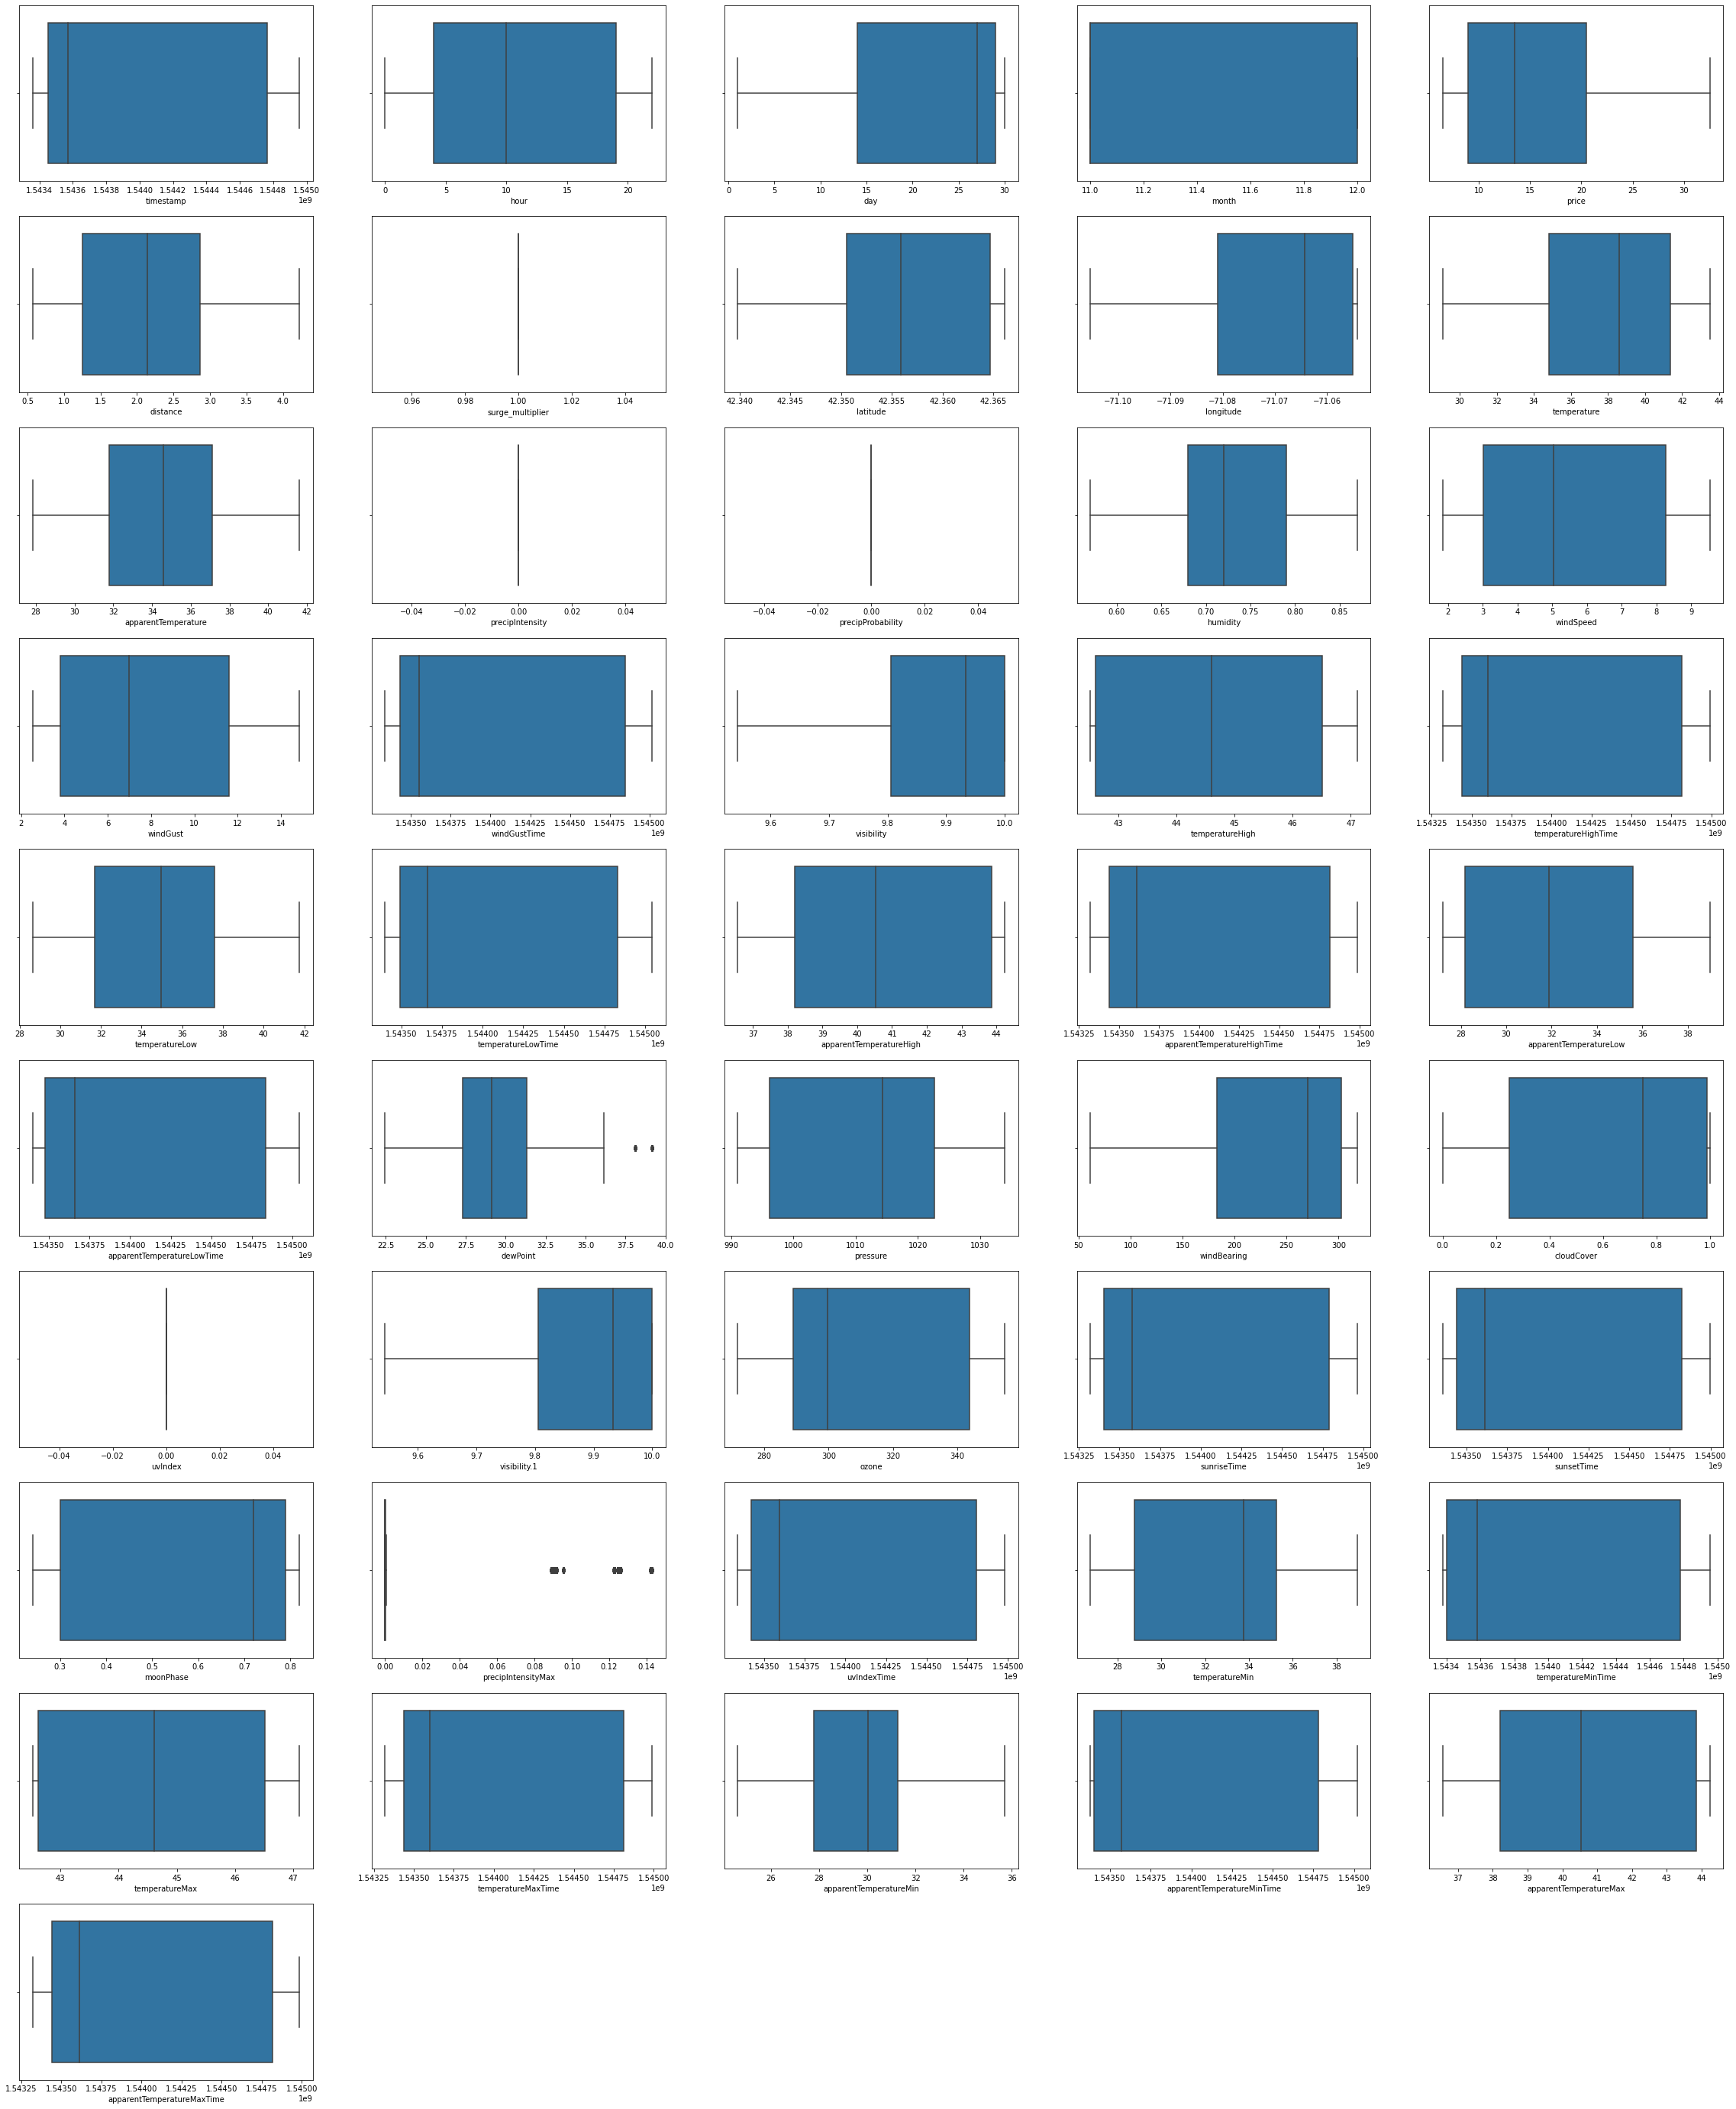

In [20]:
#After Handling Outliers
fig = plt.figure(figsize=[40,50])
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(10,5, i+1);
    ax1 = sns.boxplot(data = df, x=col)

#### Analyzing data

In [11]:
import calendar

In [12]:
#Creating a new date column in datetime format 
df["date"] = pd.to_datetime(df['datetime'], format="%Y-%m-%d %H:%M:%S")

In [13]:
#Cretaing new columns from date
df['HOURS'] = [x.hour for x in df['date']]
df['DAY'] = [x.day for x in df['date']]
df['MONTH'] = [x.month for x in df['date']]
df['DAY_OF_WEEK'] = [x.day_of_week for x in df['date']]
df["WEEKDAY"] = [calendar.day_name[x.day_of_week] for x in df['date']]

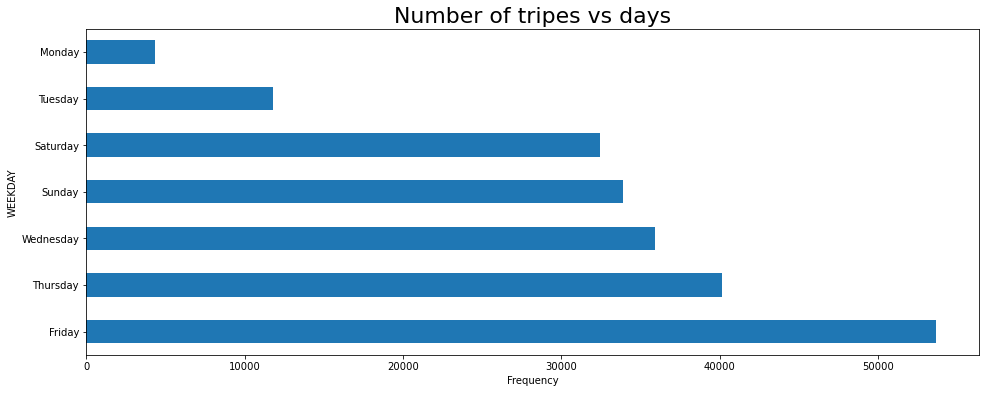

In [24]:
#visualizing trip of every day
plt.figure(figsize=(16,6))
df["WEEKDAY"].value_counts().plot(kind='barh')
plt.xlabel("Frequency")
plt.title("Number of tripes vs days", fontsize=22)
plt.show()

In [14]:
# Creating lists for source and counts
src_freq = list(data["source"].value_counts())
src = list(data['source'].unique())
src

['Haymarket Square',
 'Back Bay',
 'North End',
 'North Station',
 'Beacon Hill',
 'Boston University',
 'Fenway',
 'South Station',
 'Theatre District',
 'West End',
 'Financial District',
 'Northeastern University']

In [15]:
df["source"].value_counts().reset_index()

,source,count
0,North Station,18362
1,North End,18350
2,West End,18336
3,Haymarket Square,18246
4,South Station,18040
5,Beacon Hill,17897
6,Fenway,17590
7,Northeastern University,17461
8,Theatre District,17398
9,Boston University,17343


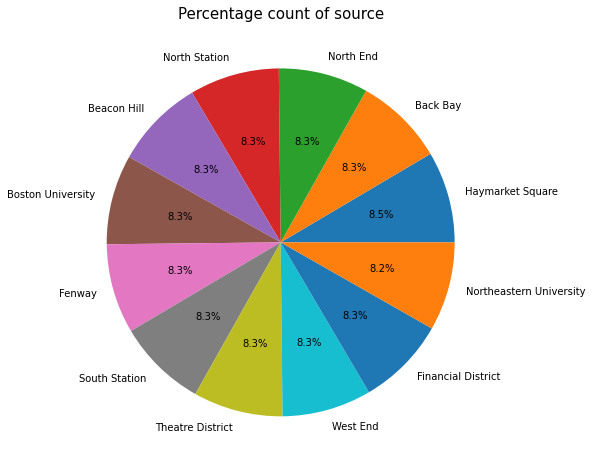

In [27]:
#Pie plot for visualizing source feature
import matplotlib.pyplot as plt

def make_autopct(values):
    def my_autopct(pct):
        return '{p:.1f}%'.format(p=pct)
    return my_autopct

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(src_freq, labels=src, autopct=make_autopct(src_freq))
ax.set_title("Percentage count of source", fontsize=15)
plt.show()

### Converting object datatype to integer

In [16]:
#Converting all categorical fetures into numerical by labelencoding
from sklearn.preprocessing import LabelEncoder

lblEn = LabelEncoder()

for col in categorical_col:
    df[col] = lblEn.fit_transform(df[col])

In [29]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,date,HOURS,DAY,MONTH,DAY_OF_WEEK,WEEKDAY
11,179510,1.543433e+09,19.0,28.0,11.0,882,0,0,8,0,7,5,7.0,1.08,1.0,42.3503,-71.0810,41.47,35.66,2,3,0.0,0.0,0.63,9.54,14.86,1.543432e+09,10.000,42.72,1.543439e+09,37.59,1.543486e+09,36.75,1.543439e+09,32.25,1.543478e+09,2,29.72,991.85,295.0,1.00,0.0,10.000,354.2,1.543406e+09,1.543440e+09,0.72,0.0000,1.543421e+09,33.82,1.543399e+09,42.72,1.543439e+09,30.19,1.543399e+09,36.75,1.543439e+09,2018-11-28 19:23:07,19,28,11,2,Wednesday
12,517,1.543616e+09,22.0,30.0,11.0,4413,0,6,11,1,3,11,12.0,1.11,1.0,42.3647,-71.0542,40.13,38.08,2,3,0.0,0.0,0.60,3.38,3.99,1.543554e+09,9.833,42.52,1.543601e+09,31.71,1.543658e+09,40.53,1.543612e+09,28.06,1.543658e+09,2,27.31,1017.16,281.0,1.00,0.0,9.833,281.8,1.543579e+09,1.543612e+09,0.79,0.0003,1.543594e+09,28.79,1.543579e+09,42.52,1.543601e+09,26.41,1.543576e+09,40.53,1.543612e+09,2018-11-30 22:13:01,22,30,11,4,Friday
17,187519,1.543519e+09,19.0,29.0,11.0,2277,0,6,11,1,5,9,6.5,1.11,1.0,42.3647,-71.0542,43.49,37.19,1,4,0.0,0.0,0.57,9.54,14.86,1.543514e+09,9.796,44.61,1.543511e+09,28.79,1.543579e+09,38.21,1.543511e+09,27.20,1.543576e+09,3,26.83,1007.12,313.0,0.53,0.0,9.796,309.7,1.543492e+09,1.543526e+09,0.75,0.0000,1.543511e+09,35.35,1.543550e+09,44.61,1.543511e+09,31.14,1.543550e+09,38.21,1.543511e+09,2018-11-29 19:18:00,19,29,11,3,Thursday
19,20733,1.544941e+09,6.0,16.0,12.0,8871,0,7,5,0,11,6,11.0,0.72,1.0,42.3661,-71.0631,40.36,35.52,0,5,0.0,0.0,0.69,7.08,8.47,1.545016e+09,10.000,43.78,1.544990e+09,34.12,1.545044e+09,38.39,1.544987e+09,28.21,1.545044e+09,1,30.94,1022.94,61.0,0.06,0.0,10.000,298.7,1.544962e+09,1.544995e+09,0.30,0.1246,1.544980e+09,38.94,1.544954e+09,43.78,1.544990e+09,33.76,1.545019e+09,38.39,1.544987e+09,2018-12-16 06:15:11,6,16,12,6,Sunday
20,52507,1.543359e+09,19.0,27.0,11.0,103,0,7,5,0,9,3,16.5,0.72,1.0,42.3661,-71.0631,42.95,37.54,1,1,0.0,0.0,0.72,9.42,13.80,1.543338e+09,10.000,46.83,1.543320e+09,33.75,1.543399e+09,43.85,1.543320e+09,29.97,1.543399e+09,3,34.56,991.05,257.0,0.81,0.0,10.000,313.6,1.543319e+09,1.543353e+09,0.68,0.1430,1.543338e+09,36.13,1.543378e+09,46.83,1.543320e+09,32.05,1.543378e+09,43.85,1.543320e+09,2018-11-27 19:18:22,19,27,11,1,Tuesday


In [17]:
#Creating another copy of dataframe for further use
df1 = df.copy()

In [18]:
#Dropping date columns as these are not necessary 
df.drop(['HOURS', 'DAY', 'MONTH', 'DAY_OF_WEEK', 'WEEKDAY', 'date'], axis=1, inplace=True)

In [32]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [33]:
# Using Heatmap Correlation Analysis

# plt.figure(figsize=(20, 10))
# mask = np.triu(np.ones_like(df.corr()))
# sns.heatmap(df.corr(),mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

In [19]:
# Split the data

x = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
#standardize or feature scaling the datasets

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

# for avoiding data leakage here we use transform not fit_transform
X_test = scaler.transform(X_test)

# Model Building for price prediction

## Linear Rregression 

In [21]:
lin_model = LinearRegression()
# Train the model
lin_model.fit(X_train, y_train)
# Make predictions
pred = lin_model.predict(X_test)

Text(0, 0.5, 'Test predicted data')

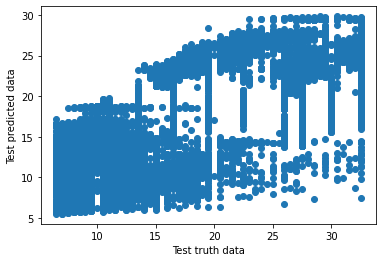

In [37]:
# visualize the relationship between the truth point and predicted point

plt.scatter(y_test, pred)       
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

<Axes: xlabel='price', ylabel='Density'>

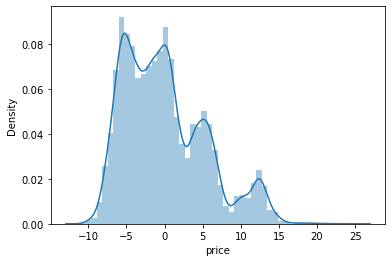

In [38]:
#Residuals

residuals = y_test - pred
sns.distplot(residuals)

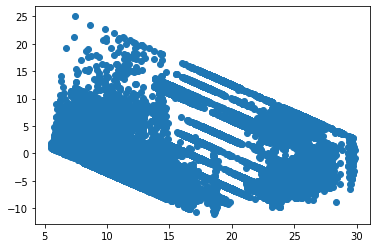

In [39]:
# scattter plot with predictions and residuals
#Check for Homoscedasticity
plt.scatter(pred, residuals)

In [22]:
# Evaluating the model performance
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1) / (len(y_test) - X_test.shape[1]-1)

In [23]:
print(' MSE: {},\n MAE: {},\n R^2: {},\n adj_r2: {}'.format(mse, mae, r2, adj_r2))

 MSE: 29.052379661847525,
 MAE: 4.325314277458909,
 R^2: 0.516821284353949,
 adj_r2: 0.5161829581826267


## Decision Tree

In [24]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
dt_regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = dt_regressor.predict(X_test)

In [25]:
# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1) / (len(y_test) - X_test.shape[1]-1)

In [26]:
print(' MSE: {},\n MAE: {},\n R^2: {},\n adj_r2: {}'.format(mse, mae, r2, adj_r2))

 MSE: 2.0763166253452305,
 MAE: 0.8847901397172994,
 R^2: 0.9654681643298801,
 adj_r2: 0.9654225444096761


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)

rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [28]:
# Predicting the test set results
predictions=rf.predict(X_test)

In [29]:
# Evaluating the model performance
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1-r2)*(len(y_test)-1) / (len(y_test) - X_test.shape[1]-1)

In [30]:
print(' MSE: {},\n MAE: {},\n R^2: {},\n adj_r2: {}'.format(mse, mae, r2, adj_r2))

 MSE: 2.8274979578477732,
 MAE: 1.0903672012416161,
 R^2: 0.9529750454982923,
 adj_r2: 0.9529129209506008


## Highest booking area Prediction

### KMeans Clustering

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [61]:
features = df1[['latitude', 'longitude', 'hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'temperature','source', 'destination', 'cab_type']]

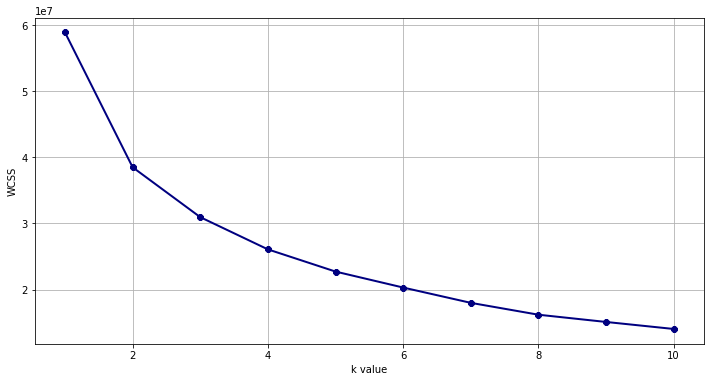

In [60]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='navy', marker='8')
plt.xlabel('k value')
plt.ylabel('WCSS')
plt.show()

In [62]:
# Standardize the location coordinates
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(features)

In [67]:
# Apply K-means clustering algorithm
kmeans = KMeans(n_clusters=4)  
label = kmeans.fit(scaled_feature)
features['cluster_label'] = kmeans.labels_

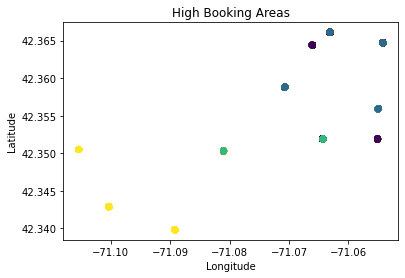

In [64]:
# Map visualization
# Plot clusters on a map
plt.scatter(features['longitude'], features['latitude'], c=features['cluster_label'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('High Booking Areas')
plt.show()

In [65]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [68]:
cluster_data = features.copy()
cluster_data['cluster'] = label

In [69]:
print(kmeans.cluster_centers_)

[[ 3.64281581e-01  4.69519713e-01 -3.75812168e-01 -1.14276605e+00
   1.13161872e+00  4.79677038e-03 -3.43682115e-03  0.00000000e+00
  -4.32270166e-01 -5.12187537e-03 -1.87305748e-04 -8.07632947e-03]
 [ 4.09369051e-01  4.90263809e-01 -5.39179246e-01  8.27454183e-01
  -8.83689870e-01 -7.47702579e-03 -4.75463963e-03  0.00000000e+00
  -4.49279279e-01 -1.95888759e-03  2.11432356e-04  9.68823844e-03]
 [ 4.08206326e-01  5.26222032e-01  1.30134466e+00  5.44083828e-01
  -5.53525845e-01  2.97525310e-03  4.69539423e-03  0.00000000e+00
   9.49641411e-01  8.67928484e-03 -6.27331720e-03 -5.31248954e-03]
 [-1.27258097e+00 -1.59581035e+00 -4.36529937e-02 -1.06038685e-01
   1.94366108e-01  6.44985576e-04  5.64756338e-03  0.00000000e+00
   2.21476381e-01  8.52880276e-04  5.41692915e-03  2.63049791e-03]]


In [70]:
data['Clusters'] = cluster_data.cluster

In [74]:
cluster_data.source.unique()

array([ 0,  6,  7,  1,  2,  3,  9, 10, 11,  4,  8,  5])

In [ ]:
###########################################################################################################################

In [83]:
# labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_feature, label)

ValueError: y should be a 1d array, got an array of shape () instead.

In [85]:
print("Shape of scaled features:", scaled_feature.shape)


Shape of scaled features: (212229, 12)


In [87]:
labels = kmeans.labels_
print("Shape of labels:", labels.shape)


Shape of labels: (212229,)


In [88]:
labels = labels.reshape(-1)


In [ ]:
labels

silhouette_avg = silhouette_score(scaled_feature, labels)
print("Silhouette Score:", silhouette_avg)


fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='source', y='price', data=features, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='source', y='price', data=features, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

### Thank you😊